In [ ]:
# bu dataset'in web sitesi
# http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# 2.jpg
# bu derste modeli olustururken functional API kullanıyoruz.
# Daha önce olusturdugumuz sekilden farklı o yüzden asıl koda gecmeden once 
# bu yeni yapıyı detaylı sekilde anlattım

In [ ]:
# 3.jpg
# burada modeli olusturmak için Functional API kullanacagız
# ilk önce giris katmanını olusturuyoruz.
# buradaki shape verideki her bir ornegin boyutu
import tensorflow as tf
i = tf.keras.Input(shape=(32,32,3))
# burdan sonra diger katmanları olusturacagız.
# her bir katman kendisinden bir önceki katmana baglıyoruz.
# bunu yapmak için de katmanın adını yazıyoruz.
# burada Conv2D katmanın input katmanından sonraki katman oldugunu belirtiyoruz.
# sonrasında her bir katmanı bu sekilde ekliyoruz.
# katmanların adı aynı olmak zorunda degil.
x = tf.keras.layers.Conv2D(16,(3,3),activation="relu")(i)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Dense(1024,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
# burada en son katmanı olusturduk
out = tf.keras.layers.Dense(10,activation="softmax")(x)
# burada ise model olusturup giris ve cıkıs katmanlarını modele veriyoruz
# modele veriyoruz
model2 = tf.keras.models.Model(inputs=i, outputs=out)
"""
bu model2'yi kullanmadık hoca sadece functional API 'ı bilelim diye gösterdi,bu yöntem aslında function ile kullanılır freecode youtube videosunda izlemiştik.
"""

In [ ]:
# 4.jpg
# burdan sonrası asıl kod

In [ ]:
# 5.jpg
import tensorflow as tf
import random
import matplotlib.pyplot as plt

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# 5.jpg
# burada veileri görsellestiriyoruz
fig = plt.figure(figsize=(30,10))
for i in range(75):
  plt.subplot(5,15,i+1) # matplot da index 1 den baslar, 0 dan baslamaz
  plt.imshow(x_train[i])
  plt.axis("off")
plt.show()

In [ ]:
# 6.jpg

# burada sıfırdan model olusturmak yerine hazır bir modeli kullanacagız
# bunları kodda fazla kullanacagız o yüzden her seferince uzunca adını yazmak 
# yerine direk import ediyoruz
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
# kullanacagımız hazır modeli import ediyoruz
from tensorflow.keras.applications.vgg16 import VGG16
# burada modeli yüklüyoruz,input shape her bir verinin boyutu
# burada sıfırdan agırlık egitmeyecegiz
# onceden egitilmiş olan imagenet agırlıklarını kullanacagız
# ayrıca son katmanı kullanmayacagız. include_top=False bunun için
vgg_model = VGG16(input_shape=[32,32,3], weights="imagenet",include_top=False)

# hazır modeldeki agırlıları egitmeyecegiz. o yüzden bunları donduruyoruz.
# yani egitilebilir özelligini false yapıyoruz
for layer in vgg_model.layers:
  layer.trainable = False
# hazır modelin son katmanını alıp bunu düzlestirdik
fl = Flatten()(vgg_model.output)
# modele yeni katmanlar ekliyoruz

x = Dense(1024,activation="relu")(fl)
x = Dropout(0.2)(x)
# en son katmanı olusturuyoruz
out = Dense(10,activation="softmax")(x)
# girdi ve cıktı katmanlarını vererek modeli olusturuyoruz
model = Model(inputs=vgg_model.input, outputs=out)

"""

 What is VGG16 model?
 VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. 
 It is one of the popular algorithms for image classification and is easy to use with transfer learning,The default input size for this model is 224x224.

  include_top: whether to include the 3 fully-connected layers at the top of the network.

  weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.

  input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.

  input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) 
or (3, 224, 224) (with channels_first data format). 
It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

  pooling: Optional pooling mode for feature extraction when include_top is False. - 
None means that the output of the model will be the 4D tensor output of the last convolutional block. 
- avg means that global average pooling will be applied to the output of the last convolutional block, 
and thus the output of the model will be a 2D tensor. - max means that global max pooling will be applied.

  classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.

  classifier_activation: A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. 
Set classifier_activation=None to return the logits of the "top" layer. When loading pretrained weights, classifier_activation can only be None or "softmax".

"""


In [ ]:
# 6.jpg
# burada bazı parametreler egitilemez olarak gözüküyor
# bunun sebebi yukarıdaki bazı katmanları dondurmus olmamız
model.summary()

In [ ]:
# 7.jpg
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
# 7.jpg
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1) # epochs=20 yaptı ,uzun diye 1 yazdım,amac modelin iyi sonuc vermesi degil ögrenmek.



1563/1563 [==============================] - 616s 394ms/step - loss: 1.3338 - accuracy: 0.5325 - val_loss: 1.2457 - val_accuracy: 0.5598


In [ ]:
# 7.jpg
# test accuracy biraz düsük fakat amacımız 
#iyi bir modelden ziyade konuları ögrenmek
# zamanı gelince cok iyi calışan modellerimiz olacak
model.evaluate(x_test,y_test)

313/313 [==============================] - 97s 309ms/step - loss: 1.2457 - accuracy: 0.5598


[1.245672583580017, 0.5598000288009644]

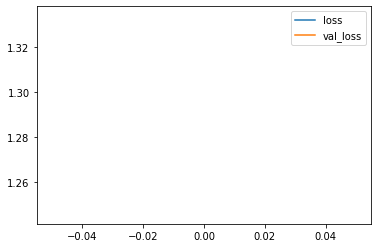

In [ ]:
# 7.jpg
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

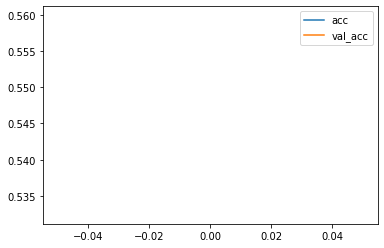

In [ ]:
# 7.jpg
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

In [ ]:
# 8.jpg
# test setindeki her bir veri için modele tahmin yaptırıyoruz.
y_predict = model.predict(x_test).argmax(axis=1)

In [ ]:
# 8.jpg
# burada veri setindeki elemanların gercek adlarını kodluyoruz
# buradaki adları veri setinden aldım
# buradaki sıralama önemli
etiket = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"]
"""
burda sayıda yazdırabilirdi plot'ta ama hoca sayı degilde name'leri yazdıralım dedi.
"""


"\nburda sayıda yazdırabilirdi plot'ta ama hoca sayı degilde name'leri yazdıralım dedi.\n"

Text(0.5, 1.0, 'Gercek deger: automobile tahmin: automobile')

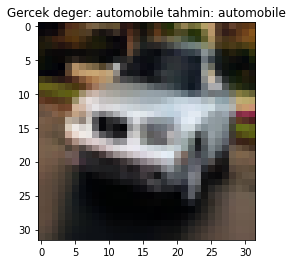

In [ ]:
# 8.jpg

# burada veri setindeki rastgele bir degerin
# gercek degerini ve modelin tahmin ettigi degeri
# kıyaslayıp veriyi gösteriyoruz.
i = random.randint(0,9999)

plt.imshow(x_test[i])
# rastgele verinin gercek adı
l1 = etiket[y_test[i]]
# rastgele verinin modelin tahmin ettigi adı
l2 = etiket[y_predict[i]]
plt.title("Gercek deger: %s tahmin: %s" % (l1,l2))
